In [ ]:
# Dica para construção do ambiente com as ferramentas necessárias para executar a biblioteca

conda create -n cptec python=3.10

conda activate cptec
conda install -c conda-forge xarray matplotlib pycurl cfgrib netcdf4 pynio xarray matplotlib pycurl cfgrib netcdf4 pynio dask
conda install -c anaconda ipykernel


In [1]:
# Import para os modelos disponiveis
# CPTEC_BAM, CPTEC_WRF, CPTEC_ETA, CPTEC_GFS

import CPTEC_BAM as BAM

In [2]:
# Durante a inicialização do construtor informações sobre os dados são exibidas
# Entre elas informações de variaveis, niveis e frequência disponiveis para consulta

bam = BAM.model()


#### The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid) #####

Forecast data available for reading between 20221125 and 20221205.

Surface variables: t2m, u10m, v10m, slp, psfc, precip
                   terrain, sbcape, sbcin, pw.
Level variables:   t, u, v, rh, g, omega.

levels (hPa): 1000  925  850  775  700  500  400  300  250
              200 150  100   70   50   30   20   10    3.

Frequency: every 6 hours [0, 6, 12, 18,...,168].



In [3]:
# Para todos modelos estão disponiveis 16 variaveis em niveis atmosféricos (hPa) e superficie
# Exemplo requisitando 2 variaveis, em 2 niveis, para a condição inicial da simulação e 1 hora de simulação

# Data da IC
date = '2022112800'

# Variaveis 
vars = ['t', 'u10m']

# Niveis
levels = [1000, 850]

# Steps = Numero de simulações futuras a partir da inicialização do modelo
steps = 1

f = bam.load(date=date, var=vars,level=levels, steps=steps)
f

<xarray.Dataset>
Dimensions:    (latitude: 1000, longitude: 2000, time: 2, level: 2)
Coordinates:
  * latitude   (latitude) float32 90.0 89.82 89.64 89.46 ... -89.64 -89.82 -90.0
  * longitude  (longitude) float32 0.0 0.18 0.36 0.54 ... 359.5 359.6 359.8
  * time       (time) datetime64[ns] 2022-11-28 2022-11-28T06:00:00
  * level      (level) float64 850.0 1e+03
Data variables:
    t          (time, level, latitude, longitude) float32 -25.44 ... -6.209
    u10m       (time, latitude, longitude) float32 3.959 3.943 ... 5.649 5.675
Attributes:
    center:   National Institute for Space Research - INPE
    model:    The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid)

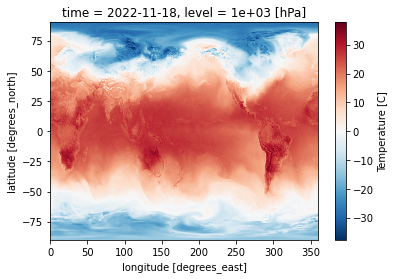

In [4]:
# Plot do campo requisitado em niveis
f.sel(time='20221118T00:00', level=1000).t.plot()

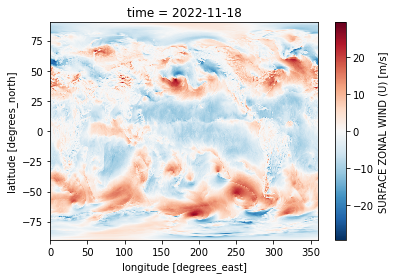

In [5]:
# Plot do campo requisitado em superficie
f.sel(time='20221118T00:00').u10m.plot()

In [6]:
# Diversas ferramentas foram implementadas neste framework para facilitar o uso
# entre elas a ferramenta que realiza durante a requisição o zoom na area desejada

# Data da IC
date = '2022111800'

# Variaveis 
vars = ['terrain']

# Recorte para AS basta altera reduce para True
bam.dict['area']['reduce'] = True

f = bam.load(date=date, var=vars, steps=1)
f

0 - 4000084
0 - 4000084


<xarray.Dataset>
Dimensions:    (latitude: 306, longitude: 306, time: 2)
Coordinates:
  * latitude   (latitude) float32 10.0 9.82 9.64 9.459 ... -44.59 -44.77 -44.95
  * longitude  (longitude) float32 277.0 277.2 277.4 277.6 ... 331.6 331.7 331.9
  * time       (time) datetime64[ns] 2022-11-18 2022-11-18T06:00:00
Data variables:
    terrain    (time, latitude, longitude) float32 367.5 340.0 308.2 ... 0.0 0.0
Attributes:
    center:   National Institute for Space Research - INPE
    model:    The Brazilian Global Atmospheric Model (TQ0666L064 / Hybrid)

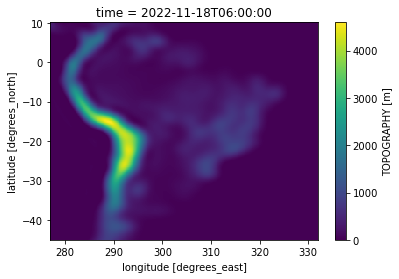

In [7]:
f.sel(time='20221118T06:00').terrain.plot()

In [8]:
# Exemplo selecionando uma area especifica

# Data da IC
date = '2022111800'

# Variaveis 
vars = ['terrain']

# Area selecionada altere reduce para true e altere os parametros de lat e lon
bam.dict['area']['reduce'] = True
bam.dict['area']['minlat'] = -35
bam.dict['area']['maxlat'] = 0
bam.dict['area']['minlon'] = 290
bam.dict['area']['maxlon'] = 320

f = bam.load(date=date, var=vars, steps=1)

0 - 4000084
0 - 4000084


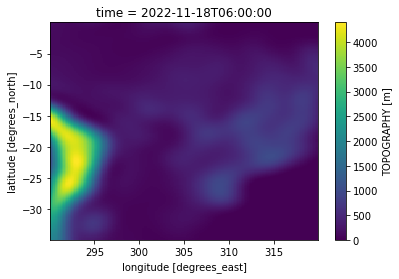

In [9]:
f.sel(time='20221118T06:00').terrain.plot()

In [10]:
# Para salvar netcdf com o resultado da requisição
f.to_netcdf('bam_20221118.nc')

In [11]:
# Caso a ferramenta seja usada rotineiramente para aquisição de dados,
# você pode definir durante a requisição a transposição do resultado além da memoria
# para uma copia no disco rigido.

# Data da IC
date = '2022111800'

# Variaveis 
vars = ['t2m']

# Para ativar a função de escrita em disco altere para true
bam.dict['save_netcdf'] = True

# Diretorio onde serão salvas as requisições
# Por padrão, quando não aterado, um diretorio chamado INPE será criado na pasta corrente do usuario

bam.dict['path_to_save'] = '/home/guatura/modelos'

f = bam.load(date=date, var=vars, steps=1)

1376028896 - 1380028980
1376028896 - 1380028980
File not available on server!


In [15]:
# Durante processo de requisição dos dados são aplicadas diversas modificações nos campos,
# para que todos tenham as mesmas unidades, caso precise dos modelos em sua forma bruta use o exemplo abaixo.

# Data da IC
date = '2022112000'

# Variaveis 
vars = ['t2m']

# Apaga no construtor a função de transformação, para retornar ao funcionamento padrão execute novamente o importe e construção do objeto
bam.dict['transform'] = ''

f = bam.load(date=date, var=vars, steps=1)
f


1376028896 - 1380028980
1376028896 - 1380028980
File not available on server!


In [16]:
# Temperatura em Kelvin
f.sel(time='20221118T06:00').t2m.plot()

AttributeError: 'NoneType' object has no attribute 'sel'


#### Regional (ams_08km) #####

Forecast data available for reading between 20221111 and 20221121.

Surface variables: t2m, u10m, v10m, slp, psfc, precip
                   terrain, sbcape, sbcin, pw.
Level variables:   t, u, v, rh, g, omega.

levels (hPa): 1020 1000 950 925 900 850 800 750 700 650 600 
                 550 500 450 400 350 300 250 200 150 100 50.

Frequency: hourly frequency [0,1,2,...,22,23].



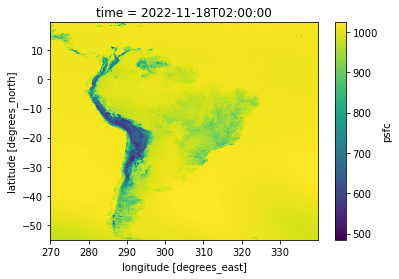

In [17]:
# Para todos modelos o funcionamento da ferramenta é idêntico, segue exemplo com o Eta.

import CPTEC_ETA as ETA

eta = ETA.model()

f = eta.load(date='2022111800', var='psfc', steps=5)
f.sel(time='20221118T02:00').psfc.plot()

In [18]:
# Quando não fornecido nenhum parametro a aplicação retornará a previsão de T2m para condição inicial do dia presente

f = eta.load()
f

<xarray.Dataset>
Dimensions:    (time: 2, latitude: 931, longitude: 875)
Coordinates:
  * time       (time) datetime64[ns] 2022-11-21 2022-11-21T01:00:00
  * latitude   (latitude) float64 -55.0 -54.92 -54.84 ... 19.24 19.32 19.4
  * longitude  (longitude) float64 270.0 270.1 270.2 270.2 ... 339.8 339.8 339.9
Data variables:
    t2m        (time, latitude, longitude) float32 5.163 5.163 ... 24.21 24.21
Attributes:
    center:   National Institute for Space Research - INPE
    model:    Eta Regional (ams_08km)

In [19]:
# Para requisitar as proximas 48 horas previstas basta modificar o steps
# Se o modelo for de 6 em 6 horas cara step terá 6 horas de diferença

f = eta.load(date='2022111800', var='t2m', steps=48)
f

<xarray.Dataset>
Dimensions:    (time: 49, latitude: 931, longitude: 875)
Coordinates:
  * time       (time) datetime64[ns] 2022-11-18 ... 2022-11-20
  * latitude   (latitude) float64 -55.0 -54.92 -54.84 ... 19.24 19.32 19.4
  * longitude  (longitude) float64 270.0 270.1 270.2 270.2 ... 339.8 339.8 339.9
Data variables:
    t2m        (time, latitude, longitude) float32 5.138 5.138 ... 24.79 24.79
Attributes:
    center:   National Institute for Space Research - INPE
    model:    Eta Regional (ams_08km)

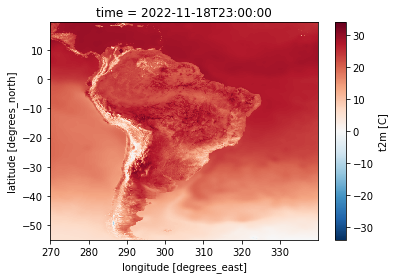

In [20]:
f.sel(time='20221118T23:00').t2m.plot()